In [3]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

full_df = pd.read_csv("/kaggle/input/informal-dataset/Informal text data.csv", nrows=5000)
# Check the actual column names in your CSV file
print(full_df.columns)
# Assuming the column with the text data is named 'message' (replace with actual name if different)
# The error

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [4]:
print(full_df.columns)

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [5]:
full_df.drop(columns=['product_id', 'user_id', 'img_link', 'product_link'], inplace=True)


In [6]:
full_df.drop(columns=['discount_percentage'], inplace=True)


In [7]:
full_df = full_df[['review_title', 'review_content', 'about_product']]



Missing Values:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
text                   0
img_link               0
product_link           0
dtype: int64

Duplicate Rows: 0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


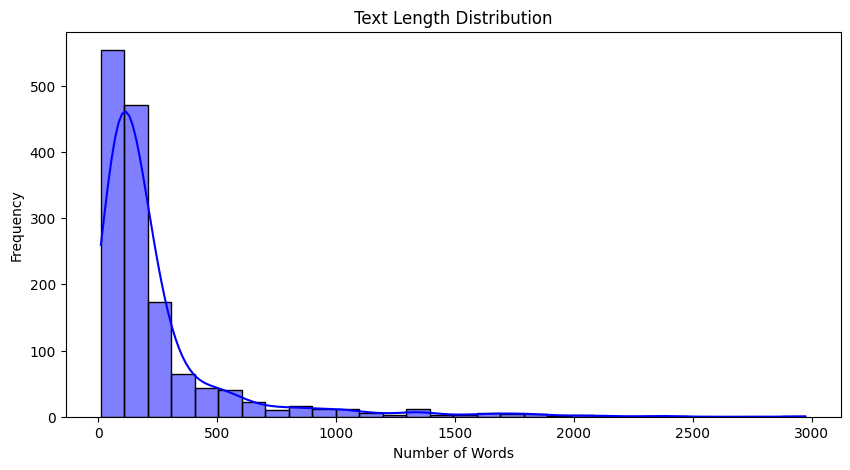


Top 20 Most Common Words: [('the', 13036), ('is', 9899), ('and', 9400), ('to', 7799), ('it', 7032), ('for', 6489), ('a', 6027), ('i', 5571), ('of', 4537), ('good', 4444), ('this', 4443), ('in', 3995), ('but', 3427), ('not', 3275), ('with', 3270), ('product', 2798), ('you', 2602), ('on', 2345), ('its', 2310), ('as', 2228)]


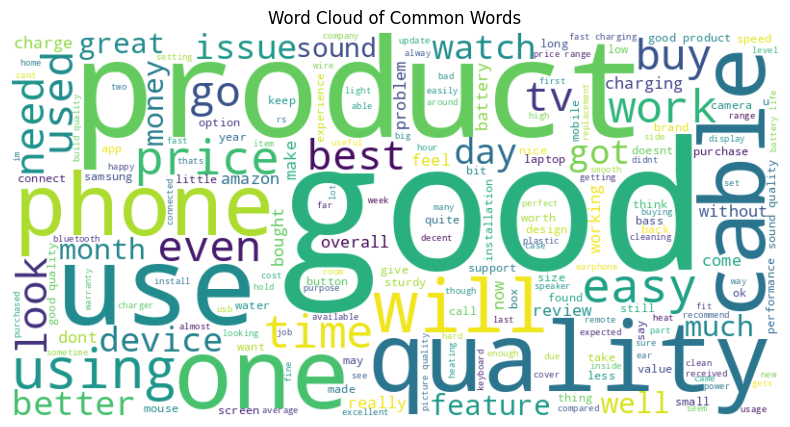


Named Entities in Sample Texts:
                                                text  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                      named_entities  
0                                  [(Charging, ORG)]  
1  [(Android Auto, ORG), (Micro USB, ORG), (Ambra...  
2                                                 []  
3  [(Nice, GPE), (33w, CARDINAL), (18w, DATE), (A...  
4  [(150rs, GPE), (iPad, ORG), (10.5, CARDINAL), ...  


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from collections import Counter
from wordcloud import WordCloud

# Load dataset (Assuming CSV file with a column 'text')
df = pd.read_csv("/kaggle/input/informal-dataset/Informal text data.csv")  # Change filename accordingly

# Assuming 'review_content' is the desired text column
# Rename 'review_content' to 'text'
df = df.rename(columns={'review_content': 'text'})
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop missing rows if necessary
df = df.dropna(subset=['text'])

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Text length distribution
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 5))
sns.histplot(df["text_length"], bins=30, kde=True, color="blue")
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Most common words analysis
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

df["clean_text"] = df["text"].apply(clean_text)
all_words = " ".join(df["clean_text"]).split()
word_freq = Counter(all_words)

# Top 20 words
top_words = word_freq.most_common(20)
print("\nTop 20 Most Common Words:", top_words)

# Wordcloud visualization
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Common Words")
plt.show()

# Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")

def extract_named_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df["named_entities"] = df["text"].apply(extract_named_entities)

# Display NER results for first 5 rows
print("\nNamed Entities in Sample Texts:")
print(df[['text', 'named_entities']].head())

In [10]:
!pip install contractions

import re
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from contractions import fix

# Download necessary NLTK resources
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words("english"))

# Load NLP model
nlp = spacy.load("en_core_web_sm")

# Load dataset
df = pd.read_csv("/kaggle/input/informal-dataset/Informal text data.csv")  # Change the filename if needed

# Assuming your text data is in the 'review_content' column
df = df.rename(columns={'review_content': 'text'}) # Rename the column to 'text'

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Expand contractions (e.g., "can't" -> "cannot")
    text = fix(text)

    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization and lemmatization using SpaCy
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words]

    # Join tokens back into a string
    return " ".join(tokens)

# Apply cleaning function
df["cleaned_text"] = df["text"].apply(clean_text)

# Preview results
print("\nSample Before & After Cleaning:")
print(df[['text', 'cleaned_text']].head())

# Save cleaned data to a new CSV file
df.to_csv("cleaned_dataset.csv", index=False)

print("\nData Cleaning Completed! Cleaned dataset saved as 'cleaned_dataset.csv'.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.3 MB/s eta 0:00:00
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)



Sample Before & After Cleaning:
                                                text  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                        cleaned_text  
0  look durable charging fine toono complainschar...  
1  order cable connect phone android auto car cab...  
2  quite durable sturdyhttpsmmediaamazoncomimages...  
3  good productlong wirecharge goodnicei buy cabl...  
4  buy instead original apple work r fast apple c...  

Data Cleaning Completed! Cleaned dataset saved as 'cleaned_dataset.csv'.


In [11]:
import pandas as pd
import spacy
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import re

# Load cleaned dataset
# Changed 'cleaned_reviews.csv' to 'cleaned_dataset.csv' to match the filename from cell 42
df = pd.read_csv("cleaned_dataset.csv")  # Load the preprocessed dataset

# Load NLP model
nlp = spacy.load("en_core_web_sm")

# Initialize Sentiment Analyzer
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# Function to extract named entities
def extract_named_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Function to compute sentiment scores
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score["compound"] >= 0.05:
        return "Positive"
    elif sentiment_score["compound"] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply Named Entity Recognition (NER)
# Changed 'lemmatized_review' to 'cleaned_text' as 'cleaned_dataset.csv' has 'cleaned_text' column
df["named_entities"] = df["cleaned_text"].apply(extract_named_entities)

# Apply Sentiment Analysis
# Changed 'lemmatized_review' to 'cleaned_text' as 'cleaned_dataset.csv' has 'cleaned_text' column
df["sentiment"] = df["cleaned_text"].apply(get_sentiment)

# TF-IDF Feature Extraction
# Changed 'lemmatized_review' to 'cleaned_text' as 'cleaned_dataset.csv' has 'cleaned_text' column
vectorizer = TfidfVectorizer(max_features=20)  # Extract top 20 words per review
tfidf_matrix = vectorizer.fit_transform(df["cleaned_text"])
tfidf_feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF results to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)
df = pd.concat([df, tfidf_df], axis=1)

# Display results
print("\nFeature-Engineered Data Sample:")
# Changed 'review_content' to 'text' as 'cleaned_dataset.csv' has 'text' column
print(df[["text", "sentiment", "named_entities"] + list(tfidf_feature_names)].head())

# Save Feature-Engineered Data
df.to_csv("feature_engineered_reviews.csv", index=False)

/usr/local/lib/python3.10/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Feature-Engineered Data Sample:
                                                text sentiment  \
0  Looks durable Charging is fine tooNo complains...  Positive   
1  I ordered this cable to connect my phone to An...  Positive   
2  Not quite durable and sturdy,https://m.media-a...  Positive   
3  Good product,long wire,Charges good,Nice,I bou...  Positive   
4  Bought this instead of original apple, does th...  Positive   

                                      named_entities      also  battery  \
0                                                 []  0.360794  0.00000   
1                          [(usb connector, PERSON)]  0.160397  0.00000   
2                                                 []  0.000000  0.00000   
3  [(mine micro type c connector, ORG), (day, DATE)]  0.000000  0.00000   
4  [(year, DATE), (year, DATE), (one, CARDINAL)

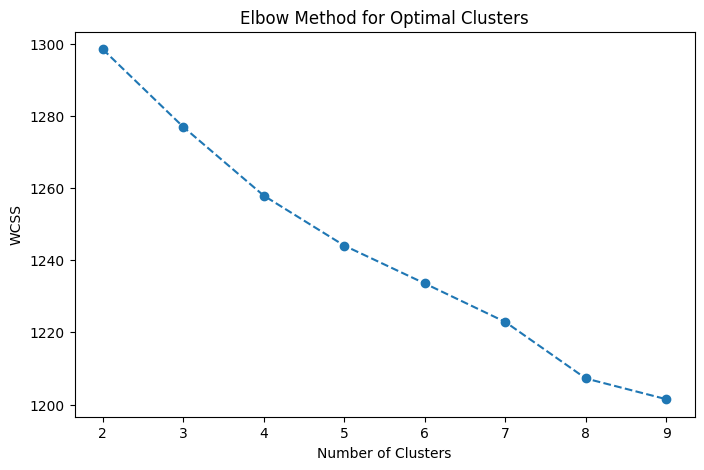

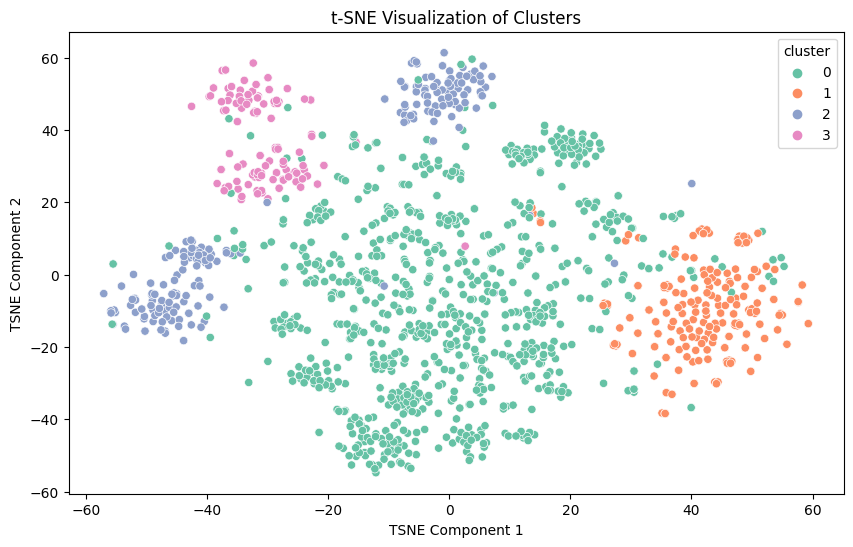


Sample Categorized Reviews:
                                                text sentiment  cluster
0  Looks durable Charging is fine tooNo complains...  Positive        1
1  I ordered this cable to connect my phone to An...  Positive        1
2  Not quite durable and sturdy,https://m.media-a...  Positive        0
3  Good product,long wire,Charges good,Nice,I bou...  Positive        1
4  Bought this instead of original apple, does th...  Positive        1
5  It's a good product.,Like,Very good item stron...  Positive        0
6  Build quality is good and it is comes with 2 y...  Positive        1
7  Worth for money - suitable for Android auto......  Positive        1
8  I use this to connect an old PC to internet. I...  Positive        0
9  I ordered this cable to connect my phone to An...  Positive        1


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load feature-engineered dataset
df = pd.read_csv("feature_engineered_reviews.csv")

# Use TF-IDF to convert text into vectors
vectorizer = TfidfVectorizer(max_features=1000)  # Increase if needed
# Changed 'lemmatized_review' to 'cleaned_text' as it's the preprocessed text column
X = vectorizer.fit_transform(df["cleaned_text"])

# Finding optimal clusters using Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(2, 10):  # Testing cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Apply K-Means Clustering
optimal_clusters = 4  # Change based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X)

# Visualizing Clusters using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=df["cluster"], palette="Set2")
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()

# Display sample cluster results
print("\nSample Categorized Reviews:")
# Changed 'review_content' to 'text' for consistency
print(df[["text", "sentiment", "cluster"]].head(10))

# Save Categorized Data
df.to_csv("categorized_reviews.csv", index=False)

In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Load clustered dataset
df = pd.read_csv("categorized_reviews.csv")

# Use TF-IDF to extract key terms per cluster
vectorizer = TfidfVectorizer(max_features=500)  # Adjust feature size as needed
# Change 'lemmatized_review' to 'cleaned_text'
X = vectorizer.fit_transform(df["cleaned_text"])

# Apply Non-Negative Matrix Factorization (NMF) for Topic Extraction
num_topics = df["cluster"].nunique()  # Match the number of clusters
nmf = NMF(n_components=num_topics, random_state=42)
W = nmf.fit_transform(X)
H = nmf.components_

# Get top words for each topic
feature_names = vectorizer.get_feature_names_out()
top_words_per_cluster = {}

for i, topic in enumerate(H):
    top_words = [feature_names[j] for j in topic.argsort()[-5:]]  # Get top 5 words
    top_words_per_cluster[i] = ", ".join(top_words)

# Assign Topic Labels Manually (Modify Based on Observations)
cluster_labels = {
    0: "Feature Request",
    1: "Bug Report",
    2: "Performance Issue",
    3: "Usability Feedback",
}  # Adjust these based on the top words per cluster

df["topic_label"] = df["cluster"].map(cluster_labels)

# Display sample results
print("\nCluster Topic Mapping:")
print(pd.DataFrame.from_dict(top_words_per_cluster, orient="index", columns=["Top Words"]))

# Change 'review_content' to 'text' for consistency
print("\nSample Labeled Reviews:")
print(df[["text", "topic_label"]].head(10))

# Save Final Labeled Data
df.to_csv("labeled_reviews.csv", index=False)


Cluster Topic Mapping:
                             Top Words
0       work, easy, use, good, product
1  charging, good, fast, charge, cable
2  good, camera, battery, phone, watch
3  picture, quality, sound, remote, tv

Sample Labeled Reviews:
                                                text      topic_label
0  Looks durable Charging is fine tooNo complains...       Bug Report
1  I ordered this cable to connect my phone to An...       Bug Report
2  Not quite durable and sturdy,https://m.media-a...  Feature Request
3  Good product,long wire,Charges good,Nice,I bou...       Bug Report
4  Bought this instead of original apple, does th...       Bug Report
5  It's a good product.,Like,Very good item stron...  Feature Request
6  Build quality is good and it is comes with 2 y...       Bug Report
7  Worth for money - suitable for Android auto......       Bug Report
8  I use this to connect an old PC to internet. I...  Feature Request
9  I ordered this cable to connect my phone to An...    

In [14]:
import re
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from contractions import fix

# Download necessary NLTK resources
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words("english"))

# Load NLP model
nlp = spacy.load("en_core_web_sm")

# Load dataset
df = pd.read_csv("/kaggle/input/informal-dataset/Informal text data.csv")  # Change the filename if needed

# Assuming your text data is in the 'review_content' column
df = df.rename(columns={'review_content': 'text'}) # Rename the column to 'text'

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Expand contractions (e.g., "can't" -> "cannot")
    text = fix(text)

    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization and lemmatization using SpaCy
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words]

    # Join tokens back into a string
    return " ".join(tokens)

# Apply cleaning function
df["cleaned_text"] = df["text"].apply(clean_text)

# Preview results
print("\nSample Before & After Cleaning:")
print(df[['text', 'cleaned_text']].head())

# Save cleaned data to a new CSV file
df.to_csv("cleaned_dataset.csv", index=False)

print("\nData Cleaning Completed! Cleaned dataset saved as 'cleaned_dataset.csv'.")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)



Sample Before & After Cleaning:
                                                text  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                        cleaned_text  
0  look durable charging fine toono complainschar...  
1  order cable connect phone android auto car cab...  
2  quite durable sturdyhttpsmmediaamazoncomimages...  
3  good productlong wirecharge goodnicei buy cabl...  
4  buy instead original apple work r fast apple c...  

Data Cleaning Completed! Cleaned dataset saved as 'cleaned_dataset.csv'.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 101.1 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)



Sample Before & After Cleaning:
                                                text  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                        cleaned_text  
0  look durable charging fine toono complainschar...  
1  order cable connect phone android auto car cab...  
2  quite durable sturdyhttpsmmediaamazoncomimages...  
3  good productlong wirecharge goodnicei buy cabl...  
4  buy instead original apple work r fast apple c...  

Data Cleaning Completed! Cleaned dataset saved as 'cleaned_dataset.csv'.

Feature-Engineered Data Sample:
                                                text sentiment  \
0  Looks durable Charging is fine tooNo complains...  Positive   
1  I ordered this cable to connect my phone to An...  Positiv

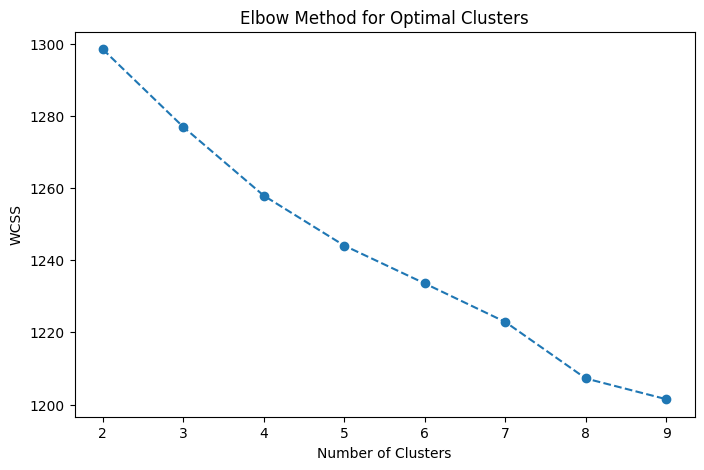


Cluster Topic Mapping:
                             Top Words
0       work, easy, use, good, product
1  charging, good, fast, charge, cable
2  good, battery, camera, phone, watch
3  picture, quality, sound, remote, tv

Sample Labeled Reviews:
                                                text      topic_label
0  Looks durable Charging is fine tooNo complains...       Bug Report
1  I ordered this cable to connect my phone to An...       Bug Report
2  Not quite durable and sturdy,https://m.media-a...  Feature Request
3  Good product,long wire,Charges good,Nice,I bou...       Bug Report
4  Bought this instead of original apple, does th...       Bug Report
5  It's a good product.,Like,Very good item stron...  Feature Request
6  Build quality is good and it is comes with 2 y...       Bug Report
7  Worth for money - suitable for Android auto......       Bug Report
8  I use this to connect an old PC to internet. I...  Feature Request
9  I ordered this cable to connect my phone to An...    

['label_encoder.pkl']

In [15]:
!pip install contractions
!pip install textblob
!pip install spacy
!python -m spacy download en_core_web_sm


import re
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from contractions import fix

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Load English stopwords
stop_words = set(stopwords.words("english"))

# Load NLP model
nlp = spacy.load("en_core_web_sm")

# Load dataset
df = pd.read_csv("/kaggle/input/informal-dataset/Informal text data.csv")  # Change the filename if needed

# Assuming your text data is in the 'review_content' column
df = df.rename(columns={'review_content': 'text'}) # Rename the column to 'text'

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Expand contractions (e.g., "can't" -> "cannot")
    text = fix(text)

    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization and lemmatization using SpaCy
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words]

    # Join tokens back into a string
    return " ".join(tokens)

# Apply cleaning function
df["cleaned_text"] = df["text"].apply(clean_text)

# Preview results
print("\nSample Before & After Cleaning:")
print(df[['text', 'cleaned_text']].head())

# Save cleaned data to a new CSV file
df.to_csv("cleaned_dataset.csv", index=False)

print("\nData Cleaning Completed! Cleaned dataset saved as 'cleaned_dataset.csv'.")


# Sentiment Analysis and Feature Engineering
import pandas as pd
import spacy
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

# Load cleaned dataset
df = pd.read_csv("cleaned_dataset.csv")

# Load NLP model
nlp = spacy.load("en_core_web_sm")

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to extract named entities
def extract_named_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Function to compute sentiment scores
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score["compound"] >= 0.05:
        return "Positive"
    elif sentiment_score["compound"] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply Named Entity Recognition (NER)
df["named_entities"] = df["cleaned_text"].apply(extract_named_entities)

# Apply Sentiment Analysis
df["sentiment"] = df["cleaned_text"].apply(get_sentiment)

# TF-IDF Feature Extraction
vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform(df["cleaned_text"])
tfidf_feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF results to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)
df = pd.concat([df, tfidf_df], axis=1)

# Display results
print("\nFeature-Engineered Data Sample:")
print(df[["text", "sentiment", "named_entities"] + list(tfidf_feature_names)].head())

# Save Feature-Engineered Data
df.to_csv("feature_engineered_reviews.csv", index=False)


# Clustering and Topic Extraction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF

# Load feature-engineered dataset
df = pd.read_csv("feature_engineered_reviews.csv")

# Use TF-IDF to convert text into vectors
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df["cleaned_text"])

# Finding optimal clusters using Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Apply K-Means Clustering
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X)

# Apply Non-Negative Matrix Factorization (NMF) for Topic Extraction
num_topics = df["cluster"].nunique()
nmf = NMF(n_components=num_topics, random_state=42)
W = nmf.fit_transform(X)
H = nmf.components_

# Get top words for each topic
feature_names = vectorizer.get_feature_names_out()
top_words_per_cluster = {}

for i, topic in enumerate(H):
    top_words = [feature_names[j] for j in topic.argsort()[-5:]]
    top_words_per_cluster[i] = ", ".join(top_words)

# Assign Topic Labels Manually (Modify Based on Observations)
cluster_labels = {
    0: "Feature Request",
    1: "Bug Report",
    2: "Performance Issue",
    3: "Usability Feedback",
}

df["topic_label"] = df["cluster"].map(cluster_labels)

# Display sample results
print("\nCluster Topic Mapping:")
print(pd.DataFrame.from_dict(top_words_per_cluster, orient="index", columns=["Top Words"]))
print("\nSample Labeled Reviews:")
print(df[["text", "topic_label"]].head(10))

# Save Final Labeled Data
df.to_csv("labeled_reviews.csv", index=False)


# Model Training and Evaluation
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load labeled dataset
df = pd.read_csv("labeled_reviews.csv")

# Convert text data into numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
# Correct column name: 'cleaned_text'
X = vectorizer.fit_transform(df["cleaned_text"]).toarray()

# Encode category labels as numbers
label_encoder = LabelEncoder()
df["category_encoded"] = label_encoder.fit_transform(df["topic_label"])
y = df["category_encoded"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_classifier = xgb.XGBClassifier(objective="multi:softmax", num_class=len(label_encoder.classes_), eval_metric="mlogloss")
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Save the trained model
joblib.dump(xgb_classifier, "xgboost_review_classifier.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd


In [17]:
# Load dataset
df = pd.read_csv("/kaggle/input/software-informal/Dataset Software Engineering .csv")

# Keep relevant columns
df = df[['reviews.text', 'reviews.rating']].dropna()

# Convert ratings to sentiment (1-2: Negative, 3: Neutral, 4-5: Positive)
def map_sentiment(rating):
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

df['sentiment'] = df['reviews.rating'].astype(int).apply(map_sentiment)

# Encode sentiment labels
label_encoder = LabelEncoder()
df["sentiment_encoded"] = label_encoder.fit_transform(df["sentiment"])


In [18]:
class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }


In [19]:
# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df["reviews.text"], df["sentiment_encoded"], test_size=0.2, random_state=42)

# Create dataset instances
train_dataset = ReviewDataset(X_train.tolist(), y_train.tolist(), tokenizer)
test_dataset = ReviewDataset(X_test.tolist(), y_test.tolist(), tokenizer)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [20]:
# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_encoder.classes_))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [21]:
# Define optimizer and loss function
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()


In [22]:
# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1, Loss: 0.6024
Epoch 2, Loss: 0.3576
Epoch 3, Loss: 0.2411


In [23]:
torch.save(model.state_dict(), "bert_sentiment_model.pth")
print("Model training complete and saved.")


Model training complete and saved.


In [24]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Define model and move it to the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)  # Adjust num_labels if needed
model.load_state_dict(torch.load("/kaggle/working/bert_sentiment_model.pth", map_location=device))
model.to(device)
model.eval()  # Set model to evaluation mode

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-24-fc971ad88ff6>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We reco

In [26]:
from sklearn.model_selection import train_test_split

# Example split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])
print(df_test.columns)


Index(['reviews.text', 'reviews.rating', 'sentiment', 'sentiment_encoded'], dtype='object')


In [35]:
test_texts = df_test["reviews.text"].tolist()


In [36]:
test_labels = df_test["sentiment_encoded"].tolist()


In [37]:
test_labels = df_test["sentiment_encoded"].tolist()


In [38]:
test_texts = df_test["reviews.text"].tolist()
test_labels = df_test["sentiment_encoded"].tolist()

print(test_texts[:2])  # Sample text
print(test_labels[:2])  # Sample encoded sentiment


['Purchased this as a gift for a teenage kid as a graduation present. Very pleased with the purchase. The kids love it. Small size, but good speakers. Perfect for the college dorms where he is scheduled to go in a couple of months. Love how the device connects to the cloud and keeps itself updated.', "I'm a huge fan of the Echo family. I have two Echo's, three Dots and one Tap. No they aren't essential to my life but I love playing music, listening to the news and controlling the Philips Hue smart lights throughout my home. It was a large investment that most of the population won't make - with that being said I am not a huge fan of the way the hockey puck Dots look like. Glossy plastic looks a little cheap to me although it has no effect on the performance of them. Having the Dot cover is a great option and it looks fantastic.Some reviewers say they look cheap or fit too loose - I'm not sure why people are moving their Dots. Since Dots are made to be stationary, have a loose fitting c

In [40]:
import torch

# Convert directly to tensor
test_labels = torch.tensor(test_labels, dtype=torch.long)


In [41]:
if isinstance(test_labels, torch.Tensor):
    test_labels = test_labels.clone().detach()
else:
    test_labels = torch.tensor(test_labels, dtype=torch.float32)


In [42]:
from transformers import BertForSequenceClassification

# Load the model
model_path = "/kaggle/working/bert_sentiment_model.pth"
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)  
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))  
model.eval()  # Set to evaluation mode


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-42-159b0b11c3eb>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We reco

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [44]:
# Step 1: Load the tokenizer again
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Step 2: Tokenize the test texts
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512, return_tensors="pt")


In [45]:
# Step 3: Get predictions from the model
model.eval()
with torch.no_grad():
    outputs = model(**test_encodings)
    predictions = torch.argmax(outputs.logits, dim=1)  # Predicted class indices


In [46]:
print(len(test_labels), len(predictions))  # Debugging step


236 236


In [47]:
min_length = min(len(test_labels), len(predictions))
test_labels = test_labels[:min_length]
predictions = predictions[:min_length]


In [54]:
# Directly use encoded labels from the dataset
test_labels = df_test["sentiment_encoded"].tolist()
test_labels = np.array(test_labels)
predictions = np.array(predictions)

# Compute accuracy again
accuracy = accuracy_score(test_labels, predictions)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8941


In [57]:
print("Sample predictions:", predictions[:20])
print("Sample true labels:", test_labels[:20])


Sample predictions: [2 2 2 1 1 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2]
Sample true labels: [2 2 2 1 0 0 1 2 2 2 1 1 2 2 2 2 1 2 2 2]


In [58]:
print("Unique in predictions:", np.unique(predictions))
print("Unique in test labels:", np.unique(test_labels))


Unique in predictions: [0 1 2]
Unique in test labels: [0 1 2]


In [60]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

# Use in CrossEntropyLoss
criterion = nn.CrossEntropyLoss(weight=class_weights)


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust feature count as needed
X_train_tfidf = vectorizer.fit_transform(X_train)

# Now apply SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

print("Class distribution before:", Counter(y_train))
print("Class distribution after:", Counter(y_train_resampled))


Class distribution before: Counter({2: 777, 1: 103, 0: 61})
Class distribution after: Counter({2: 777, 1: 777, 0: 777})


In [51]:
import pandas as pd

# Load dataset
df = pd.read_csv("/kaggle/input/software-informal/Dataset Software Engineering .csv")

# Check column names
print("Columns in dataset:", df.columns)

# Convert ratings into sentiment labels
if "reviews.rating" in df.columns:
    df["sentiment"] = df["reviews.rating"].apply(lambda x: 2 if x >= 4 else (1 if x == 3 else 0))  
else:
    raise ValueError("Column 'reviews.rating' not found in dataset. Check the dataset.")

# Separate features and labels
X = df["reviews.text"]  # Text data as features
y = df["sentiment"]  # New sentiment labels


Columns in dataset: Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


In [52]:
pip install transformers torch torchvision scikit-learn pandas


Note: you may need to restart the kernel to use updated packages.


In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# Load dataset
df = pd.read_csv("/kaggle/input/software-informal/Dataset Software Engineering .csv")  # Change filename accordingly

# Check available columns
print("Columns in dataset:", df.columns)

# Target column
target = "reviews.rating"  # Ensure this column exists
if target not in df.columns:
    raise KeyError(f"Column '{target}' not found in dataset. Available columns: {df.columns}")

# Convert ratings to sentiment classes (Negative: 0, Neutral: 1, Positive: 2)
df["sentiment"] = df[target].apply(lambda x: 0 if x <= 2 else (1 if x == 3 else 2))

# Balance dataset using oversampling
class_counts = Counter(df["sentiment"])
print("Class distribution before:", class_counts)
max_class = max(class_counts.values())
balanced_df = df.groupby("sentiment", group_keys=False).apply(lambda x: x.sample(max_class, replace=True))
print("Class distribution after:", Counter(balanced_df["sentimen5t"]))

# Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer(
            text, 
            padding="max_length", 
            truncation=True, 
            max_length=self.max_length, 
            return_tensors="pt"
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long),
        }

# Split dataset
train_texts, test_texts, train_labels, test_labels = train_test_split(
    balanced_df["reviews.text"].fillna(""), balanced_df["sentiment"], test_size=0.2, stratify=balanced_df["sentiment"]
)

# Create DataLoader
train_dataset = ReviewDataset(train_texts.tolist(), train_labels.tolist(), tokenizer)
test_dataset = ReviewDataset(test_texts.tolist(), test_labels.tolist(), tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Model
class SentimentModel(nn.Module):
    def __init__(self):
        super(SentimentModel, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.fc = nn.Linear(768, 3)  # 3 sentiment classes

    def forward(self, input_ids, attention_mask, token_type_ids=None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        return self.fc(outputs.pooler_output)

# Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SentimentModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

# Train model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}")

# Evaluation
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Metrics
accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(all_labels, all_preds, digits=4))


Columns in dataset: Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')
Class distribution before: Counter({2: 1397, 1: 124, 0: 76})
Class distribution after: Counter({0: 1397, 1: 1397, 2: 1397})


<ipython-input-53-844657437d50>:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby("sentiment", group_keys=False).apply(lambda x: x.sample(max_class, replace=True))


Epoch [1/10], Loss: 89.0694
Epoch [2/10], Loss: 12.6422
Epoch [3/10], Loss: 8.8070
Epoch [4/10], Loss: 7.0440
Epoch [5/10], Loss: 6.0145
Epoch [6/10], Loss: 5.7834
Epoch [7/10], Loss: 5.7450
Epoch [8/10], Loss: 5.5856
Epoch [9/10], Loss: 5.3711
Epoch [10/10], Loss: 5.2116
Test Accuracy: 0.9774
              precision    recall  f1-score   support

           0     0.9859    1.0000    0.9929       280
           1     0.9492    1.0000    0.9739       280
           2     1.0000    0.9319    0.9647       279

    accuracy                         0.9774       839
   macro avg     0.9784    0.9773    0.9772       839
weighted avg     0.9783    0.9774    0.9772       839



In [62]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from sentence_transformers import SentenceTransformer, util

# Load models
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")
embedder = SentenceTransformer('all-MiniLM-L6-v2')


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import pandas as pd
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm

# Load dataset
df = pd.read_csv('/kaggle/input/informal-dataset/Informal text data.csv')

# Load models
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")
embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Text transformation function (BATCH)
def batch_transform_text(texts, task="paraphrase", batch_size=16):
    results = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        input_texts = [f"{task}: {text}" for text in batch]
        inputs = t5_tokenizer(input_texts, return_tensors="pt", padding=True, truncation=True)
        with torch.no_grad():
            output_ids = t5_model.generate(**inputs, max_length=60)
        outputs = [t5_tokenizer.decode(ids, skip_special_tokens=True) for ids in output_ids]
        results.extend(outputs)
    return results

texts = df["review_content"].astype(str).tolist()

# Apply paraphrasing in batches
df["paraphrased"] = batch_transform_text(texts, task="paraphrase")

# Similarity check (batch encoded for speed)
original_embeddings = embedder.encode(df["review_content"].astype(str).tolist(), convert_to_tensor=True, batch_size=32)
paraphrased_embeddings = embedder.encode(df["paraphrased"].tolist(), convert_to_tensor=True, batch_size=32)
similarities = util.cos_sim(original_embeddings, paraphrased_embeddings).diagonal().cpu().numpy()

df["similarity"] = similarities

# Output
print(df[["review_content", "paraphrased", "similarity"]])

# Save CSV
df.to_csv("t5_transformed_output.csv", index=False)
